<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/NN_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml

Data=fetch_openml('mnist_784')

In [0]:
X,y_actual=Data["data"][:1000]/10000,Data["target"][:1000]

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

def show_imag(X,y_actual,position):
  img=X[position]
  imag=img.reshape(int(np.sqrt(img.size)),int(np.sqrt(img.size)))
  plt.imshow(imag,cmap = matplotlib.cm.binary, interpolation="nearest")
  plt.show()
  print(y_actual[position]) 

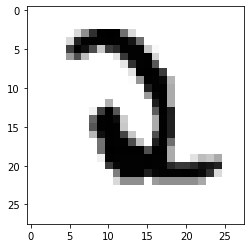

2


In [4]:
show_imag(X,y_actual,400)

In [0]:
def convert_binary(y_actual):
  y1=np.zeros((len(y_actual),10))
  for i in range(len(y_actual)):
    y1[i][int(y_actual[i])]=1
    
    
  return y1

In [0]:
NumHlayers=10
NumHunits=30

In [45]:
y=convert_binary(y_actual)
m,n=np.shape(X)
p,s=np.shape(y)
X_with_bias=np.c_[np.ones((m,1)),X]
hidden=np.ones((NumHlayers,m,NumHunits+1))
z=np.ones((NumHlayers,m,NumHunits))
a=np.ones((NumHlayers,m,NumHunits))
d=np.ones((NumHlayers,m,NumHunits+1))
ITheta=np.random.rand(n+1,NumHunits)
#Igrad=np.zeros((n+1,NumHunits))
HTheta=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
HTGrad=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
HGrad=np.zeros((NumHlayers,NumHunits+1))
ETheta=np.random.rand(NumHunits+1,s)
#EGrad=np.zeros((NumHunits+1,s))

z[0]=np.matmul(X_with_bias,ITheta)
a[0]=1/(1+np.exp(-1*z[0]))
hidden[0]=np.c_[np.ones((m,1)),a[0]]
for i in range(NumHlayers-1):
  z[i+1]=np.matmul(hidden[i],HTheta[i])
  a[i+1]=1/(1+np.exp(-1*z[i+1]))
  hidden[i+1]=np.c_[np.ones((m,1)),a[i+1]]
pred=1/(1+np.exp(-1*np.matmul(hidden[i+1],ETheta)))
print(pred[999],y[999])
cost=sum(((pred-y)**2).transpose()).reshape(-1,1)
dpred=pred-y
#Egrad_init=np.zeros((m,NumHunits+1,s))
Egrad=np.matmul((hidden[NumHlayers-1].transpose()),(2*dpred)*(pred*(1-pred)))/1000
HGrad[NumHlayers-1]=sum(np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())).reshape(1,-1)/1000
for j in range(NumHlayers-1):
  k=NumHlayers-j-2
  HTGrad[k]=np.matmul((sum(hidden[k]).reshape(1,-1)/1000).transpose(),((((sum(a[9])/1000).reshape(1,-1))*(1-((sum(a[9])/1000).reshape(1,-1))))*(HGrad[9,1:31].reshape(1,-1))))

  
  



[0.99997807 0.99999991 0.99999995 0.99999999 0.99999962 0.9999998
 0.99999982 0.99999934 0.99999991 0.99999999] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [44]:
((((sum(a[9])/1000).reshape(1,-1))*(1-((sum(a[9])/1000).reshape(1,-1))))*(HGrad[9,1:31].reshape(1,-1))).shape


(1, 30)

In [33]:
(sum(hidden[8]).reshape(1,-1)/1000).shape

(1, 31)

In [41]:
(HGrad[9,1:31].reshape(1,-1))

array([[3.52195882e-06, 2.63110338e-06, 3.26686237e-06, 4.41339409e-06,
        3.65724624e-06, 3.04367649e-06, 7.16949572e-06, 4.64944402e-06,
        5.70373588e-06, 4.35193094e-06, 3.73119573e-06, 5.92687141e-06,
        3.54048909e-06, 6.41665544e-06, 3.14334260e-06, 3.89254041e-06,
        4.19360818e-06, 5.45532293e-06, 7.59393187e-06, 7.81975884e-06,
        4.21373750e-06, 5.24977664e-06, 2.90466137e-06, 3.78457509e-06,
        5.89432150e-06, 3.83836710e-06, 3.52177005e-06, 3.75456488e-06,
        3.32385155e-06, 4.34721926e-06]])

In [40]:
HGrad[9]

array([3.63259926e-06, 3.52195882e-06, 2.63110338e-06, 3.26686237e-06,
       4.41339409e-06, 3.65724624e-06, 3.04367649e-06, 7.16949572e-06,
       4.64944402e-06, 5.70373588e-06, 4.35193094e-06, 3.73119573e-06,
       5.92687141e-06, 3.54048909e-06, 6.41665544e-06, 3.14334260e-06,
       3.89254041e-06, 4.19360818e-06, 5.45532293e-06, 7.59393187e-06,
       7.81975884e-06, 4.21373750e-06, 5.24977664e-06, 2.90466137e-06,
       3.78457509e-06, 5.89432150e-06, 3.83836710e-06, 3.52177005e-06,
       3.75456488e-06, 3.32385155e-06, 4.34721926e-06])

In [46]:
HTGrad[8]

array([[1.26864235e-11, 2.08796641e-12, 4.10844678e-12, 7.58636627e-12,
        1.07639053e-10, 3.58968123e-11, 9.49187314e-12, 4.39876180e-12,
        2.28099565e-12, 9.90916947e-11, 1.18656797e-11, 4.03046844e-12,
        4.11542785e-12, 2.26223560e-12, 4.24259625e-11, 1.78626961e-11,
        1.10157839e-12, 6.58956666e-13, 1.41994168e-12, 1.31464577e-11,
        2.43875932e-12, 7.01672961e-12, 3.17352334e-11, 2.25472312e-13,
        2.68190567e-13, 9.57508168e-12, 1.90158697e-12, 3.41366308e-13,
        5.89394136e-13, 1.11460984e-11],
       [1.26864221e-11, 2.08796618e-12, 4.10844633e-12, 7.58636544e-12,
        1.07639041e-10, 3.58968084e-11, 9.49187211e-12, 4.39876133e-12,
        2.28099540e-12, 9.90916839e-11, 1.18656784e-11, 4.03046800e-12,
        4.11542740e-12, 2.26223536e-12, 4.24259579e-11, 1.78626942e-11,
        1.10157827e-12, 6.58956594e-13, 1.41994153e-12, 1.31464563e-11,
        2.43875906e-12, 7.01672885e-12, 3.17352299e-11, 2.25472287e-13,
        2.68190538e-13,

In [0]:
np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())

In [0]:
Egrad

In [0]:
pred

In [0]:
ETheta